## Artificial Neural Network

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [64]:
## As given from previous homeworks in COGS 118A 
def draw_heatmap(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$layers$', ylabel='$momentum$')
    plt.title(acc_desc + ' w.r.t $layers$ and $momentum$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## covtype.data

In [3]:
COV_TYPE = np.loadtxt('./covtype.data', delimiter=',')
COV_TYPE_X = COV_TYPE[:,:53]
COV_TYPE_Y = COV_TYPE[:,54]
COV_TYPE_X, null_1, COV_TYPE_Y, null_2 = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=10000/581012)

In [4]:
for i in range(len(COV_TYPE_Y)):
    if COV_TYPE_Y[i] == 2: COV_TYPE_Y[i] = 1
    else: COV_TYPE_Y[i] = 0

In [5]:
# 20/80
ann = MLPClassifier()
params = {'hidden_layer_sizes': [(1,),(2,),(4,),(8,),(32,),(128,)], 
          'max_iter': [10000], 
          'momentum': [0, 0.2, 0.5, 0.9],
          'solver': ['sgd']}
clf = GridSearchCV(ann, params, cv=5)
nn_adjusted_COV_TYPE_X = COV_TYPE_X - np.mean(COV_TYPE_X, axis = 0)
nn_cov_xtrain, nn_cov_xtest, nn_cov_ytrain, nn_cov_ytest = train_test_split(nn_adjusted_COV_TYPE_X, 
                                                                            COV_TYPE_Y,
                                                                            train_size=0.20)
clf.fit(nn_cov_xtrain, nn_cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

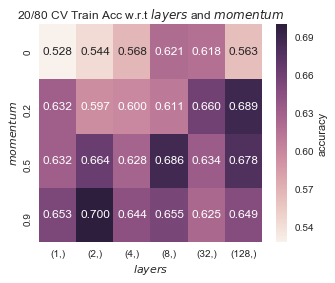

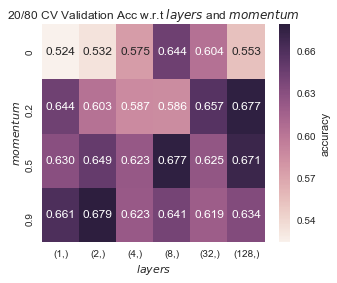

In [71]:
draw_heatmap(clf.cv_results_['mean_train_score'].reshape(-1,6), '20/80 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(clf.cv_results_['mean_test_score'].reshape(-1,6), '20/80 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [35]:
ann = MLPClassifier(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], 
                    max_iter=10000, 
                    momentum=clf.best_params_['momentum'],
                    solver='sgd')
ann.fit(nn_cov_xtrain, nn_cov_ytrain)
print('20/80 train/test split...')
print('Best hidden layer size: ', clf.best_params_['hidden_layer_sizes'])
print('Best momentum: ', clf.best_params_['momentum'])
print('Test accuracy:', ann.score(nn_cov_xtest, nn_cov_ytest))

20/80 train/test split...
Best hidden layer size:  (32,)
Best momentum:  0.9
Test accuracy: 0.6965


In [8]:
# 50/50
ann_2 = MLPClassifier()
params = {'hidden_layer_sizes': [(1,),(2,),(4,),(8,),(32,),(128,)], 
          'max_iter': [10000], 
          'momentum': [0, 0.2, 0.5, 0.9],
          'solver': ['sgd']}
clf_2 = GridSearchCV(ann, params, cv=5)
nn_cov_xtrain, nn_cov_xtest, nn_cov_ytrain, nn_cov_ytest = train_test_split(nn_adjusted_COV_TYPE_X, 
                                                                            COV_TYPE_Y,
                                                                            train_size=0.50)
clf_2.fit(nn_cov_xtrain, nn_cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

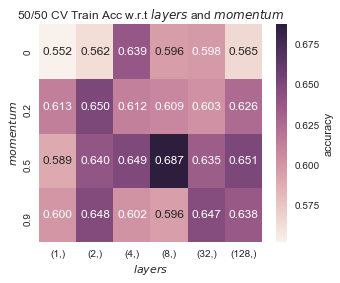

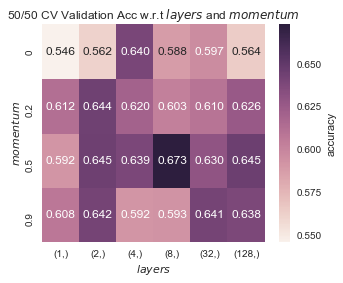

In [72]:
draw_heatmap(clf_2.cv_results_['mean_train_score'].reshape(-1,6), '50/50 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(clf_2.cv_results_['mean_test_score'].reshape(-1,6), '50/50 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [36]:
ann_2 = MLPClassifier(hidden_layer_sizes=clf_2.best_params_['hidden_layer_sizes'], 
                      max_iter=10000, 
                      momentum=clf_2.best_params_['momentum'],
                      solver='sgd')
ann_2.fit(nn_cov_xtrain, nn_cov_ytrain)
print('50/50 train/test split...')
print('Best hidden layer size: ', clf_2.best_params_['hidden_layer_sizes'])
print('Best momentum: ', clf_2.best_params_['momentum'])
print('Test accuracy: ', ann_2.score(nn_cov_xtest, nn_cov_ytest))

50/50 train/test split...
Best hidden layer size:  (8,)
Best momentum:  0.9
Test accuracy:  0.71


In [11]:
# 80/20
ann_3 = MLPClassifier()
params = {'hidden_layer_sizes': [(1,),(2,),(4,),(8,),(32,),(128,)], 
          'max_iter': [10000], 
          'momentum': [0, 0.2, 0.5, 0.9],
          'solver': ['sgd']}
clf_3 = GridSearchCV(ann, params, cv=5)
nn_cov_xtrain, nn_cov_xtest, nn_cov_ytrain, nn_cov_ytest = train_test_split(nn_adjusted_COV_TYPE_X, 
                                                                            COV_TYPE_Y,
                                                                            train_size=0.80)
clf_3.fit(nn_cov_xtrain, nn_cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

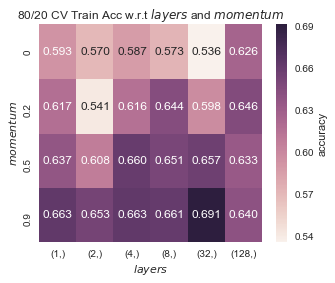

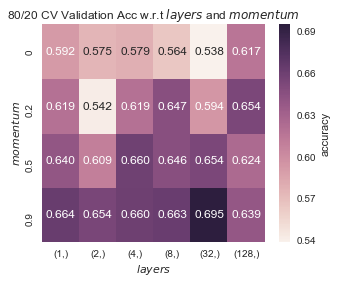

In [73]:
draw_heatmap(clf_3.cv_results_['mean_train_score'].reshape(-1,6), '80/20 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(clf_3.cv_results_['mean_test_score'].reshape(-1,6), '80/20 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [37]:
ann_3 = MLPClassifier(hidden_layer_sizes=clf_3.best_params_['hidden_layer_sizes'], 
                      max_iter=10000, 
                      momentum=clf_3.best_params_['momentum'],
                      solver='sgd')
ann_3.fit(nn_cov_xtrain, nn_cov_ytrain)
print('80/20 train/test split...')
print('Best hidden layer size: ', clf_3.best_params_['hidden_layer_sizes'])
print('Best momentum: ', clf_3.best_params_['momentum'])
print('Test accuracy: ', ann_3.score(nn_cov_xtest, nn_cov_ytest))

80/20 train/test split...
Best hidden layer size:  (128,)
Best momentum:  0.5
Test accuracy:  0.717


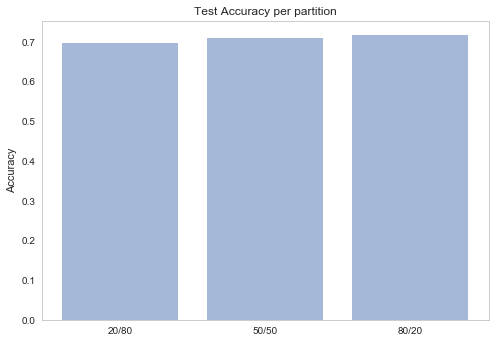

In [74]:
plt.figure()
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.6965, 0.71, 0.717]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()

## letter-recognition.data

In [47]:
letters = pd.read_csv('./letter-recognition.data')
letters_samples = letters.as_matrix()[:,1:17]
letters_p2 = letters.as_matrix()[:,0]

letters_p2_x, letters_x_final, letters_p2_y, letters_y_final = train_test_split(letters_samples,
                                                              letters_p2,
                                                              train_size=10000/19999)

nn_adjusted_letter_p2_x = letters_p2_x - np.mean(letters_p2_x, axis=0)

# Treat letters_p2 as A-M positive, remaining negative
for i in range(len(letters_p2_y)):
    if letters_p2_y[i] == "A": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "B": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "C": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "D": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "E": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "F": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "G": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "H": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "I": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "J": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "K": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "L": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "M": letters_p2_y[i] = 1
    else:
        letters_p2_y[i] = 0
letters_p2_y = letters_p2_y.astype('int')

In [15]:
# 20/80
letter_ann = MLPClassifier()
params = {'hidden_layer_sizes': [(1,),(2,),(4,),(8,),(32,),(128,)], 
          'max_iter': [10000], 
          'momentum': [0, 0.2, 0.5, 0.9],
          'solver': ['sgd']}
letter_clf_1 = GridSearchCV(letter_ann, params, cv=5)
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(nn_adjusted_letter_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.20)
letter_clf_1.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

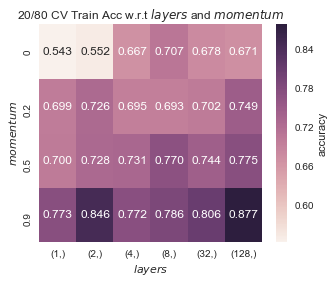

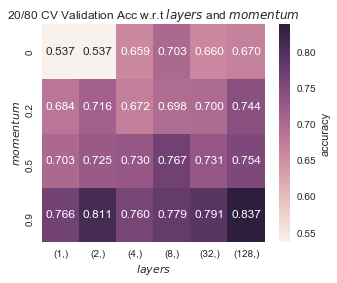

In [77]:
draw_heatmap(letter_clf_1.cv_results_['mean_train_score'].reshape(-1,6), '20/80 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(letter_clf_1.cv_results_['mean_test_score'].reshape(-1,6), '20/80 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)


In [80]:
letter_ann_1 = MLPClassifier(hidden_layer_sizes=letter_clf_1.best_params_['hidden_layer_sizes'], 
                    max_iter=10000, 
                    momentum=letter_clf_1.best_params_['momentum'],
                    solver='sgd')
letter_ann_1.fit(letters_train_x, letters_train_y)
print('20/80 train/test split...')
print('Best hidden layer size: ', letter_clf_1.best_params_['hidden_layer_sizes'])
print('Best momentum: ', letter_clf_1.best_params_['momentum'])
print('Test accuracy: ', letter_ann_1.score(letters_test_x, letters_test_y))

20/80 train/test split...
Best hidden layer size:  (128,)
Best momentum:  0.9
Test accuracy:  0.9365


In [18]:
# 50/50
letter_ann = MLPClassifier()
letter_clf_2 = GridSearchCV(letter_ann, params, cv=5)
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(nn_adjusted_letter_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.50)
letter_clf_2.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

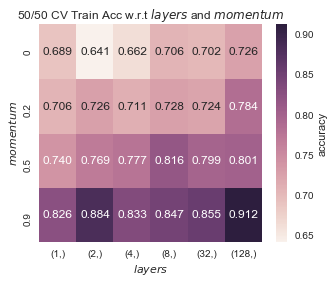

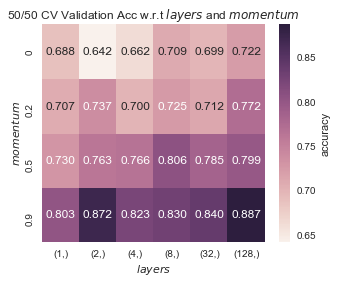

In [78]:
draw_heatmap(letter_clf_2.cv_results_['mean_train_score'].reshape(-1,6), '50/50 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(letter_clf_2.cv_results_['mean_test_score'].reshape(-1,6), '50/50 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [46]:
letter_ann_2 = MLPClassifier(hidden_layer_sizes=letter_clf_2.best_params_['hidden_layer_sizes'], 
                    max_iter=10000, 
                    momentum=letter_clf_2.best_params_['momentum'],
                    solver='sgd')
letter_ann_2.fit(letters_train_x, letters_train_y)
print('50/50 train/test split...')
print('Best hidden layer size: ', letter_clf_2.best_params_['hidden_layer_sizes'])
print('Best momentum: ', letter_clf_2.best_params_['momentum'])
print('Test accuracy: ', letter_ann_2.score(letters_test_x, letters_test_y))

50/50 train/test split...
Best hidden layer size:  (128,)
Best momentum:  0.9
Test accuracy:  0.9445


In [21]:
# 80/20
letter_ann = MLPClassifier()
letter_clf_3 = GridSearchCV(letter_ann, params, cv=5)
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(nn_adjusted_letter_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.80)
letter_clf_3.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

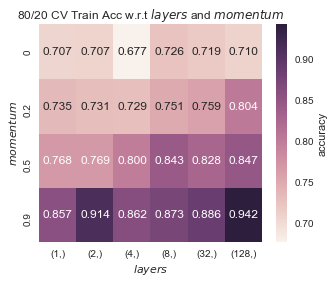

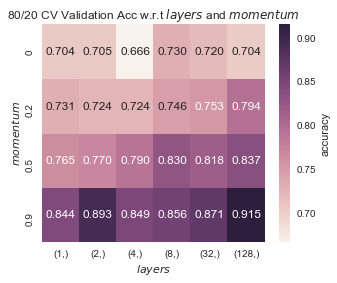

In [82]:
draw_heatmap(letter_clf_3.cv_results_['mean_train_score'].reshape(-1,6), '80/20 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(letter_clf_3.cv_results_['mean_test_score'].reshape(-1,6), '80/20 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [42]:
letter_ann_3 = MLPClassifier(hidden_layer_sizes=letter_clf_3.best_params_['hidden_layer_sizes'], 
                    max_iter=10000, 
                    momentum=letter_clf_3.best_params_['momentum'],
                    solver='sgd')
letter_ann_3.fit(letters_train_x, letters_train_y)
print('80/20 train/test split...')
print('Best hidden_layer_size: ', letter_clf_3.best_params_['hidden_layer_sizes'])
print('Best momentum: ', letter_clf_3.best_params_['momentum'])
print('Test accuracy: ', letter_ann_3.score(letters_test_x, letters_test_y))

80/20 train/test split...
Best hidden_layer_size:  (128,)
Best momentum:  0.9
Test accuracy:  0.934


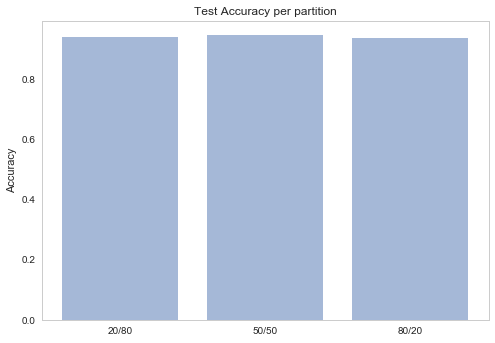

In [81]:
plt.figure()
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.9365, 0.9445, 0.934]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()

## ADULT.data

In [24]:
adults = pd.read_csv('./adult.data.txt')
adults = pd.get_dummies(adults, prefix=['workclass', 'education', 'marital_status', 
'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])
adults = adults.as_matrix()
adults_x = adults[:,:108]
adults_y = adults[:,109]

In [25]:
adults_x, null_1, adults_y, null_2 = train_test_split(adults_x, adults_y, train_size=10000/32560)

In [26]:
# 20/80
nn_adults_x = adults_x - np.mean(adults_x, axis=0)
nn_adults_y = adults_y
nn_adults_train_x, nn_adults_test_x, nn_adults_train_y, nn_adults_test_y = train_test_split(nn_adults_x, 
                                                                                            nn_adults_y, 
                                                                                            train_size=0.20)

In [27]:
adults_nn = MLPClassifier()
adult_clf_1 = GridSearchCV(adults_nn, params, cv=5)
adult_clf_1.fit(nn_adults_train_x, nn_adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

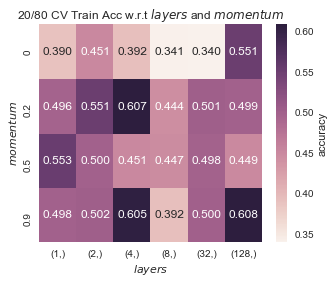

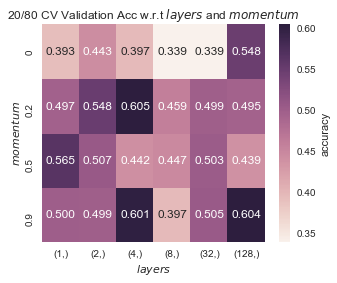

In [83]:
draw_heatmap(adult_clf_1.cv_results_['mean_train_score'].reshape(-1,6), '20/80 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(adult_clf_1.cv_results_['mean_test_score'].reshape(-1,6), '20/80 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [29]:
trained_adults_nn = MLPClassifier(hidden_layer_sizes=adult_clf_1.best_params_['hidden_layer_sizes'],
                                  max_iter=10000,
                                  momentum=adult_clf_1.best_params_['momentum'])
trained_adults_nn.fit(nn_adults_train_x, nn_adults_train_y)
print(trained_adults_nn.score(nn_adults_test_x, nn_adults_test_y))

0.762625


In [30]:
# 50/50
nn_adults_train_x, nn_adults_test_x, nn_adults_train_y, nn_adults_test_y = train_test_split(nn_adults_x, 
                                                                                            nn_adults_y, 
                                                                                            train_size=0.50)

In [31]:
adults_nn = MLPClassifier()
adult_clf_2 = GridSearchCV(adults_nn, params, cv=5)
adult_clf_2.fit(nn_adults_train_x, nn_adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1,), (2,), (4,), (8,), (32,), (128,)], 'max_iter': [10000], 'momentum': [0, 0.2, 0.5, 0.9], 'solver': ['sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

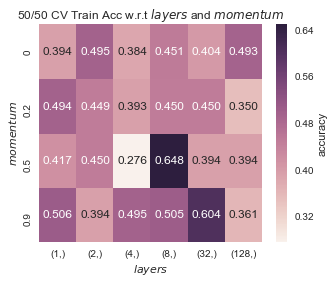

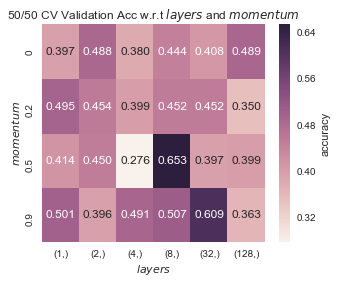

In [84]:
draw_heatmap(adult_clf_2.cv_results_['mean_train_score'].reshape(-1,6), '50/50 CV Train Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)
draw_heatmap(adult_clf_2.cv_results_['mean_test_score'].reshape(-1,6), '50/50 CV Validation Acc', 
             params['hidden_layer_sizes'],
            params['momentum'],)

In [34]:
trained_adults_nn = MLPClassifier(hidden_layer_sizes=adult_clf_2.best_params_['hidden_layer_sizes'],
                                  max_iter=10000,
                                  momentum=adult_clf_2.best_params_['momentum'])
trained_adults_nn.fit(nn_adults_train_x, nn_adults_train_y)
print(trained_adults_nn.score(nn_adults_test_x, nn_adults_test_y))

0.7812


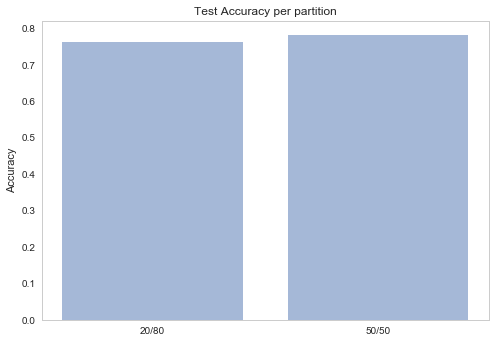

In [85]:
plt.figure()
partitions = ('20/80', '50/50')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.7626, 0.7812]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()